In [137]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [138]:
os.chdir('C:\\Users\\Лара\\Desktop\\Datastas\\')

In [139]:
dt = pd.read_csv('DV.csv', sep=",", header = 1, index_col = False)
dt.head()

,code,attributes,period,dohod,vytraty
0,0,Україна,2005,381404,335753
1,100000000,Автономна Республіка Крим,2005,13883,13521
2,500000000,Вінницька,2005,12193,9306
3,700000000,Волинська,2005,6808,6070
4,1200000000,Дніпропетровська,2005,31344,26711


# Описова статистика

In [140]:
dt[['dohod','vytraty']].describe()

,dohod,vytraty
count,4.200000e+02,4.200000e+02
mean,1.132772e+05,1.090014e+05
std,3.413973e+05,3.348952e+05
min,2.845000e+03,3.175000e+03
25%,2.102025e+04,1.862400e+04
50%,4.029300e+04,3.735850e+04
75%,7.418625e+04,7.441800e+04
max,3.744060e+06,3.756517e+06


array([[<AxesSubplot:title={'center':'dohod'}>,
        <AxesSubplot:title={'center':'vytraty'}>]], dtype=object)

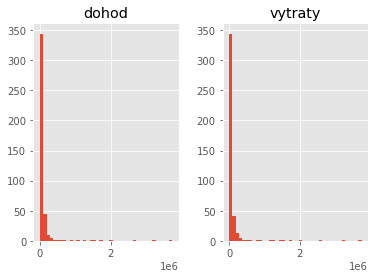

In [141]:
dt[['dohod','vytraty']].hist(bins = 40)

array([[<AxesSubplot:title={'center':'dohod'}>,
        <AxesSubplot:title={'center':'vytraty'}>]], dtype=object)

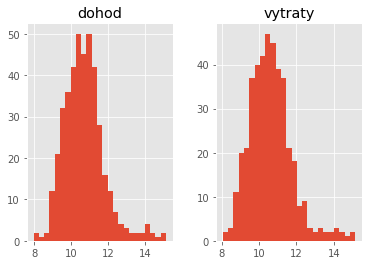

In [142]:
np.log(dt[['dohod','vytraty']]).hist(bins = 25)

In [143]:
# імпортуємо gaussian_kde для ядерної оцінки плотності
from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist

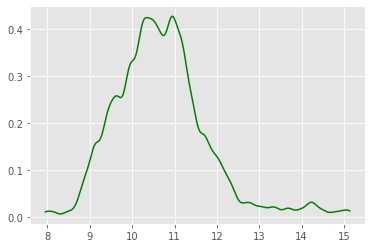

In [144]:
my_density = gaussian_kde(np.log(dt['dohod']), bw_method = 0.1)

#график
x = linspace(min(np.log(dt['dohod'])), max(np.log(dt['dohod'])), 1000)
plot(x, my_density(x), 'g')

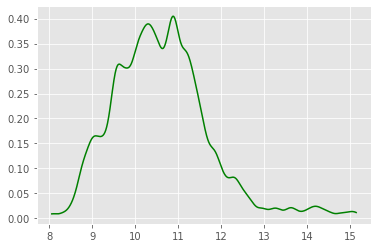

In [145]:
my_density = gaussian_kde(np.log(dt['vytraty']), bw_method = 0.1)

#график
x = linspace(min(np.log(dt['vytraty'])), max(np.log(dt['vytraty'])), 1000)
plot(x, my_density(x), 'g')

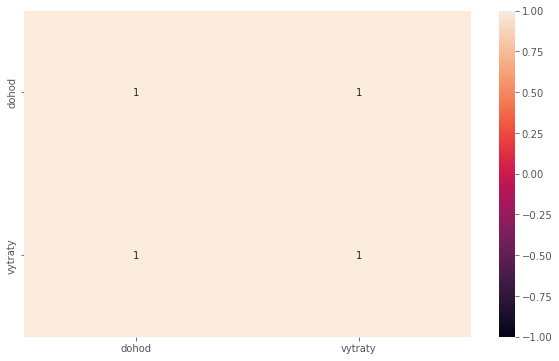

In [146]:
#теплова карта кореляцією
from scipy import stats
import seaborn as sns
import math
dt_corr = dt[['dohod','vytraty']].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(dt_corr, annot = True, vmin = -1, vmax = 1)
bottom, top = ax.get_ylim()

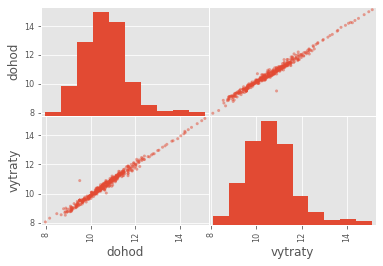

In [147]:
#матриця
from pandas.plotting import scatter_matrix
scatter_matrix(np.log(dt[['dohod','vytraty']]));

In [148]:
dt1 = pd.read_csv('isu2.csv', sep=',', header = 0, index_col = False)

In [149]:
dt1.head()

,period,income,Unemployed,spending,Unemployed_v
0,2005,381404,1595,335753,7.8
1,2006,472061,1514,427858,7.4
2,2007,623289,1417,575510,6.9
3,2008,845641,1424,793630,6.9
4,2009,894286,1957,813909,9.6


array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'Unemployed_v'}>],
       [<AxesSubplot:title={'center':'spending'}>, <AxesSubplot:>]],
      dtype=object)

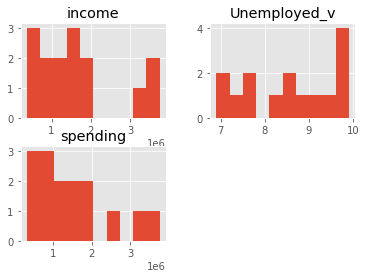

In [151]:
dt1[['income','Unemployed_v','spending']].hist()

In [152]:
dt1[['income','Unemployed_v','spending']].describe()

,income,Unemployed_v,spending
count,1.500000e+01,15.000000,1.500000e+01
mean,1.644545e+06,8.553333,1.510930e+06
std,1.111104e+06,1.038451,1.016160e+06
min,3.814040e+05,6.900000,3.357530e+05
25%,8.699635e+05,7.750000,8.037695e+05
50%,1.457864e+06,8.600000,1.310584e+06
75%,1.911674e+06,9.550000,1.889842e+06
max,3.744060e+06,9.900000,3.756517e+06


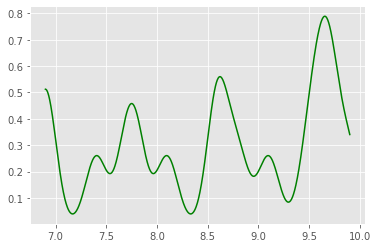

In [153]:
my_density = gaussian_kde(dt1['Unemployed_v'], bw_method = 0.1)

#график
x = linspace(min(dt1['Unemployed_v']), max(dt1['Unemployed_v']), 1000)
plot(x, my_density(x), 'g')

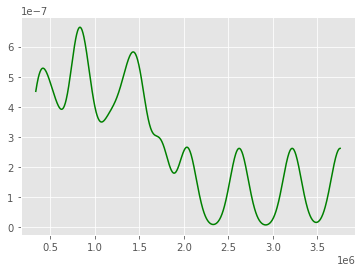

In [154]:
my_density = gaussian_kde(dt1['spending'], bw_method = 0.1)

#график
x = linspace(min(dt1['spending']), max(dt1['spending']), 1000)
plot(x, my_density(x), 'g')

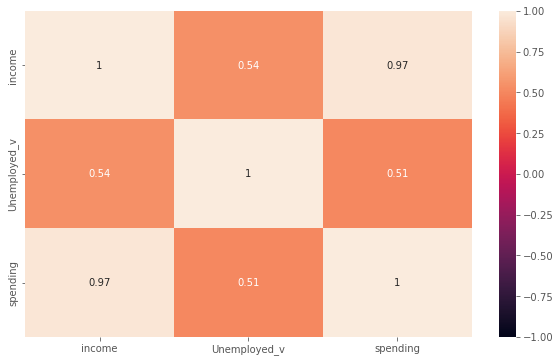

In [156]:
#теплова карта кореляцією
from scipy import stats
import seaborn as sns
import math
dt_corr = dt1[['income','Unemployed_v','spending']].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(dt_corr, annot = True, vmin = -1, vmax = 1)
bottom, top = ax.get_ylim()

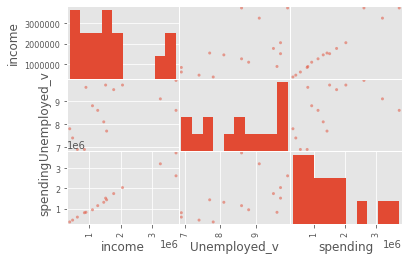

In [157]:
#матриця
from pandas.plotting import scatter_matrix
scatter_matrix(dt1[['income','Unemployed_v','spending']]);

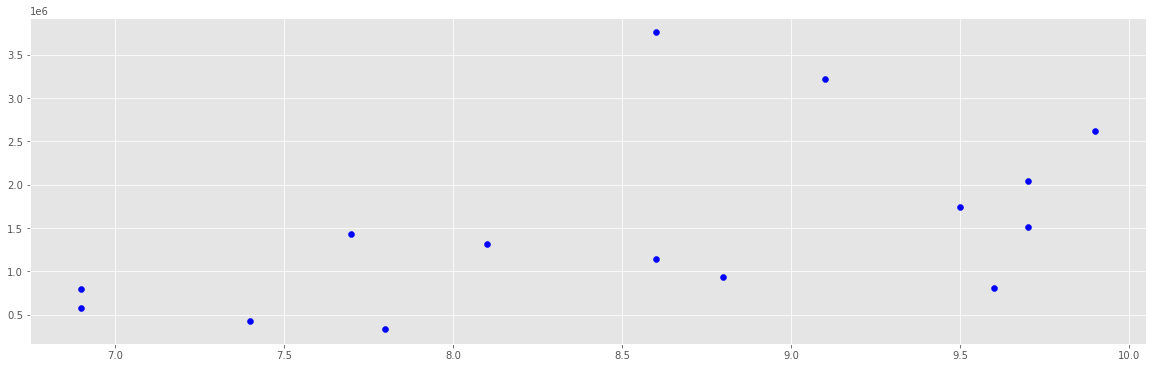

In [158]:
plt.figure(figsize=(20,6))
plt.scatter(dt1['Unemployed_v'],dt1.spending, color = 'blue')

<Figure size 1152x576 with 0 Axes>

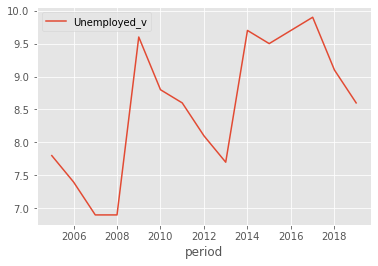

In [159]:
#Подивимося на залежність рівня безробіття від часу
Datat = dt1[['period','Unemployed_v']]
Datat.set_index('period', inplace = True)

#графік залежності
plt.figure(figsize=(16,8))
Datat.plot()
plt.show()

# Лінійна регресія

In [160]:
X = dt.iloc[:, 3:4].values
y = dt.iloc[:, -1].values

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [162]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

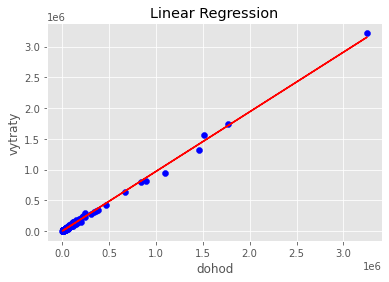

In [163]:
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, lm.predict(X_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('dohod')
plt.ylabel('vytraty')

plt.show()

# Поліноміальна  регресійна модель

In [164]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X_train)

X_polynom

array([[1.00000000e+00, 2.05960000e+04, 4.24195216e+08],
       [1.00000000e+00, 8.15810000e+04, 6.65545956e+09],
       [1.00000000e+00, 1.21030000e+04, 1.46482609e+08],
       [1.00000000e+00, 4.71520000e+04, 2.22331110e+09],
       [1.00000000e+00, 2.45934000e+05, 6.04835324e+10],
       [1.00000000e+00, 3.07844000e+05, 9.47679283e+10],
       [1.00000000e+00, 7.14850000e+04, 5.11010522e+09],
       [1.00000000e+00, 9.22130000e+04, 8.50323737e+09],
       [1.00000000e+00, 3.51250000e+04, 1.23376562e+09],
       [1.00000000e+00, 1.45786400e+06, 2.12536744e+12],
       [1.00000000e+00, 2.99880000e+04, 8.99280144e+08],
       [1.00000000e+00, 2.96540000e+04, 8.79359716e+08],
       [1.00000000e+00, 3.56280000e+04, 1.26935438e+09],
       [1.00000000e+00, 2.94890000e+04, 8.69601121e+08],
       [1.00000000e+00, 2.57410000e+04, 6.62599081e+08],
       [1.00000000e+00, 5.73240000e+04, 3.28604098e+09],
       [1.00000000e+00, 1.61140000e+04, 2.59660996e+08],
       [1.00000000e+00, 8.97020

In [165]:
Polym = LinearRegression()
Polym.fit(X_polynom, y_train)

LinearRegression()

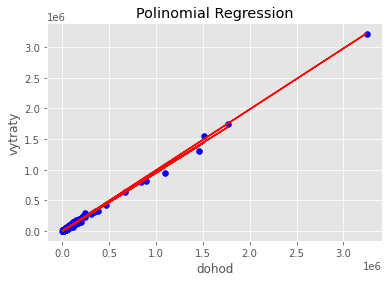

In [166]:
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, Polym.predict(polynom.fit_transform(X_train)), color = 'red')
plt.title('Polinomial Regression')
plt.xlabel('dohod')
plt.ylabel('vytraty')

plt.show()

# Оцінемо моделі

In [167]:
y_predict_slr = lm.predict(X_test)

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Linear Regression: ', r_square)


R-Square Error associated with Linear Regression:  0.9980232360591336


In [168]:
y_predict_pr = Polym.predict(polynom.fit_transform(X_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is: ', r_square)

R-Square Error associated with Polynomial Regression is:  0.9988324263192006


In [170]:
lm.predict([[675427]])

array([654020.38892754])

In [172]:
Polym.predict(polynom.fit_transform([[675427]]))

array([631975.99103129])

# Побудуєм лінійну регресійну модель на очищених даних
# прибрали з даних викиди

In [173]:
dt1 = pd.read_csv('DV2.csv', sep=",", header = 0, index_col = False)
dt1.head()

,attributes,period,dohod,vytraty
0,Автономна Республіка Крим,2005,13883,13521
1,Вінницька,2005,12193,9306
2,Волинська,2005,6808,6070
3,Дніпропетровська,2005,31344,26711
4,Донецька,2005,40753,28840


In [174]:
dt1.describe()

,period,dohod,vytraty
count,405.000000,405.000000,405.000000
mean,2012.000000,59259.809877,56986.192593
std,4.325838,69210.646818,67738.185367
min,2005.000000,2845.000000,3175.000000
25%,2008.000000,20723.000000,18197.000000
50%,2012.000000,38780.000000,36432.000000
75%,2016.000000,70126.000000,69627.000000
max,2019.000000,675427.000000,638614.000000


In [175]:
X = dt1.iloc[:, 2:3].values
y = dt1.iloc[:, -1].values

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [177]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

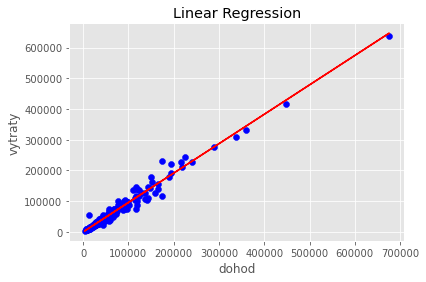

In [178]:
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, lm2.predict(X_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('dohod')
plt.ylabel('vytraty')

plt.show()

In [179]:
y_predict_slr = lm2.predict(X_test)

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Linear Regression: ', r_square)

R-Square Error associated with Linear Regression:  0.9733440882421326


In [180]:
lm2.predict([[675427]])

array([646890.40558321])

In [181]:
dt1 = pd.read_csv('isu2.csv', sep=',', header = 0, index_col = False)

In [182]:
dt1.head()

,period,income,Unemployed,spending,Unemployed_v
0,2005,381404,1595,335753,7.8
1,2006,472061,1514,427858,7.4
2,2007,623289,1417,575510,6.9
3,2008,845641,1424,793630,6.9
4,2009,894286,1957,813909,9.6


# Лінійна регресія

In [183]:
#  обераємо дані для моделі з якими будем працювати
X = dt1.iloc[:, 3:4].values
y = dt1.iloc[:, -1].values

In [184]:
#Розділяємо на навчальну та тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [185]:
# Навчаємо нашу модель
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

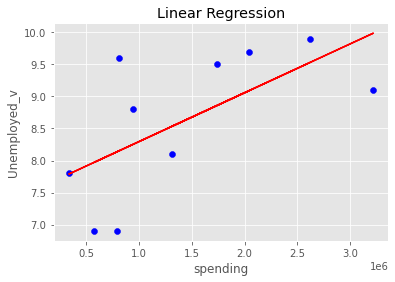

In [186]:
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, lm2.predict(X_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('spending')
plt.ylabel('Unemployed_v')

plt.show()

In [187]:
y_predict_slr = lm2.predict(X_test)

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Linear Regression: ', r_square)

R-Square Error associated with Linear Regression:  -0.6456676062075744


In [188]:
import statsmodels.api as sm

In [189]:
lm = sm.OLS.from_formula('spending ~ Unemployed_v', dt1)
result = lm.fit()
result.summary()

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               spending   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     4.513
Date:                Mon, 27 Dec 2021   Prob (F-statistic):             0.0534
Time:                        18:30:28   Log-Likelihood:                -226.00
No. Observations:                  15   AIC:                             456.0
Df Residuals:                      13   BIC:                             457.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.738e+06   2.01e+06     -1.360      0.197   -7.09e+06    1.61e+06
Unemployed_v  4.967e+05   2.34e+05      2.124      0.053   -8418.483       1e+06
==============================================================================
Omnibus:                        7.893   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                4.486
Skew:                           1.214   Prob(JB):                        0.106
Kurtosis:                       4.131   Cond. No.                         74.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
dt1 = pd.read_csv('VT.csv', sep=',', header = 1, index_col = False)
dt1.head()

,коди,дата,дані
0,1,2005,265714
1,2,2005,99013
2,3,2005,17325
3,4,2005,12667
4,5,2005,33256


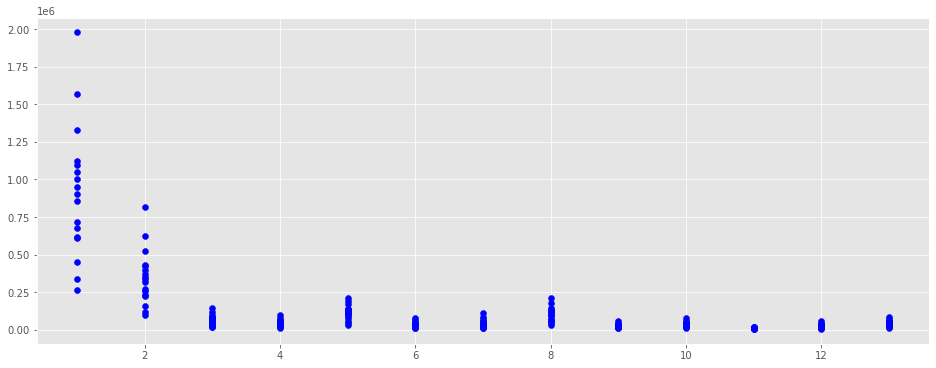

In [196]:
plt.figure(figsize=(16,6))
plt.scatter( dt1['коди'], dt1['дані'], color = 'blue')